In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("salaries.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [8]:
df['salary'].value_counts()

92000     5
72500     4
74000     4
105000    3
101000    3
         ..
76840     1
83001     1
113278    1
155500    1
81035     1
Name: salary, Length: 371, dtype: int64

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

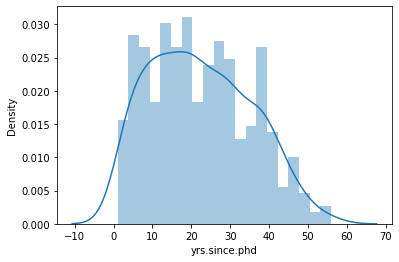

In [9]:
sns.distplot(df['yrs.since.phd'],bins=20)

<AxesSubplot:xlabel='yrs.service'>

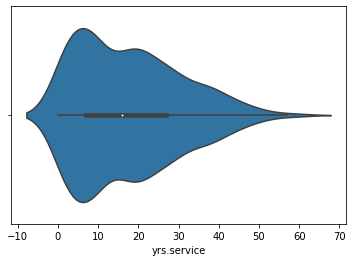

In [10]:
sns.violinplot(x="yrs.service",data=df)

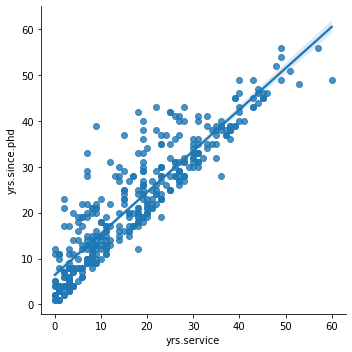

In [11]:
sns.lmplot(x='yrs.service',y='yrs.since.phd',data=df)

<AxesSubplot:xlabel='rank', ylabel='salary'>

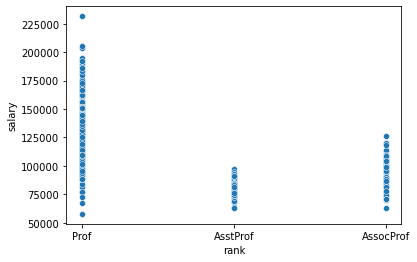

In [12]:
import seaborn as sns
sns.scatterplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

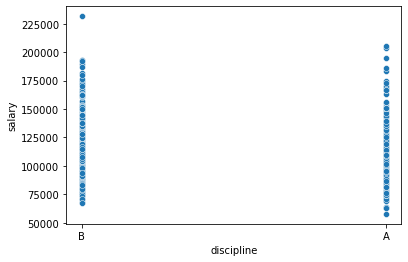

In [13]:
import seaborn as sns
sns.scatterplot(x='discipline',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

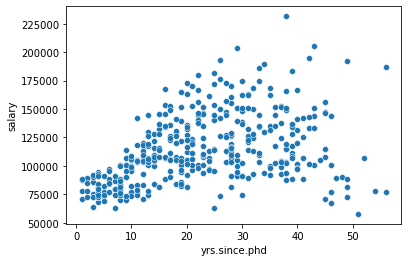

In [14]:
import seaborn as sns
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

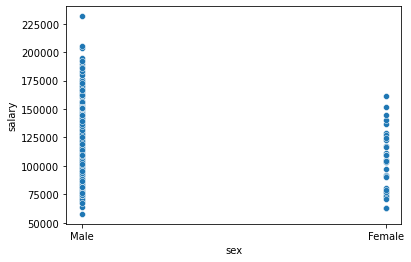

In [15]:
import seaborn as sns
sns.scatterplot(x='sex',y='salary',data=df)

<AxesSubplot:xlabel='salary'>

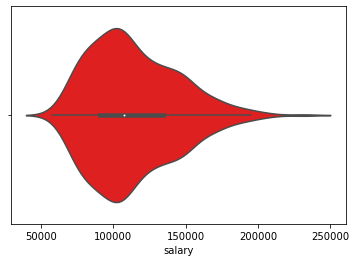

In [16]:
sns.violinplot(x='salary',data=df,color="red")

In [17]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [18]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

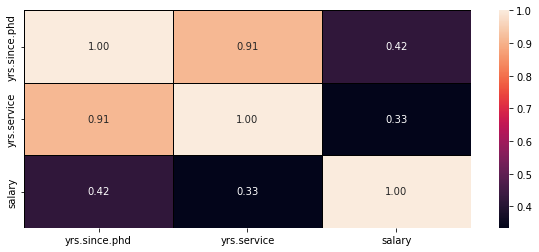

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt='.2f')

In [21]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


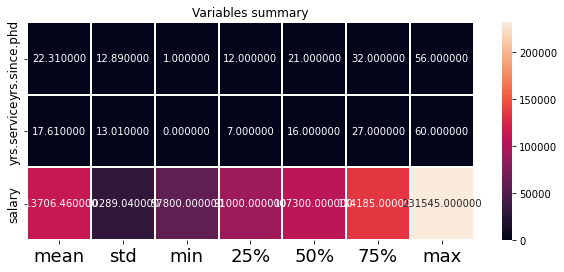

In [23]:
plt.figure(figsize=(10,4))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

In [27]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


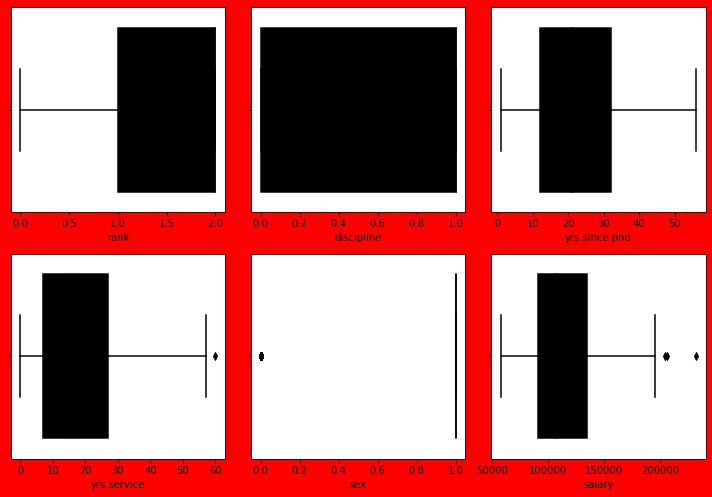

In [28]:
from sklearn.preprocessing import LabelEncoder
graph = 1
plt.figure(figsize=(10,10),facecolor='red')
for column in df:

    plt.subplot(3,3,graph)
    sns.boxplot(df[column],color='black',orient='v')
    plt.xlabel(column,fontsize=10)
    graph+=1
    plt.tight_layout()

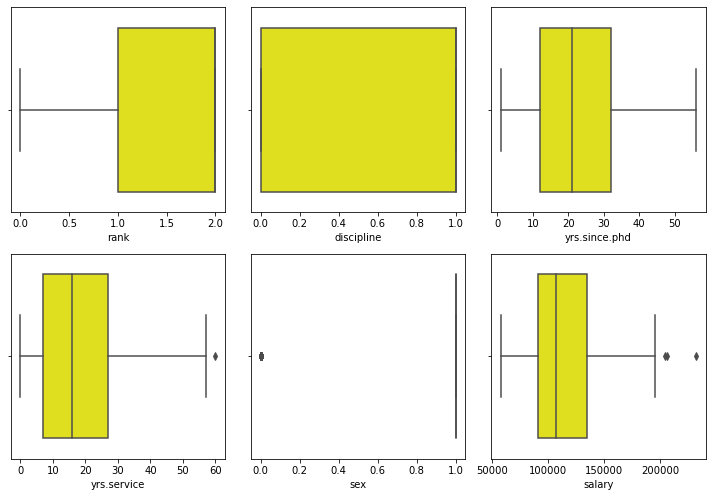

In [29]:
graph=1
plt.figure(figsize=(10,10))
for column in df:
    plt.subplot(3,3,graph)
  
    sns.boxplot(df[column],color='yellow',orient='h')
    plt.xlabel(column,fontsize=10)
    graph+=1
    plt.tight_layout()

In [30]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

<AxesSubplot:xlabel='rank', ylabel='Density'>

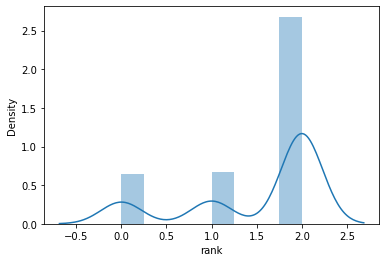

In [31]:
sns.distplot(df['rank'])

<AxesSubplot:xlabel='discipline', ylabel='Density'>

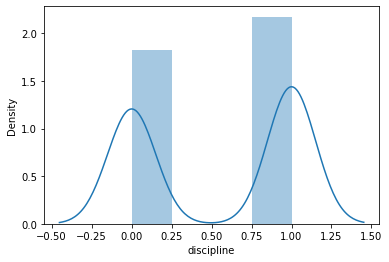

In [32]:
sns.distplot(df['discipline'])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

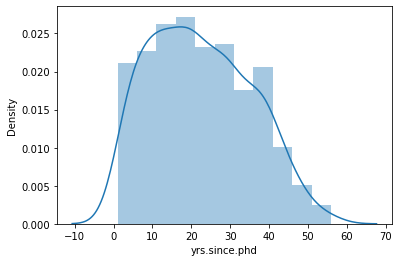

In [33]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

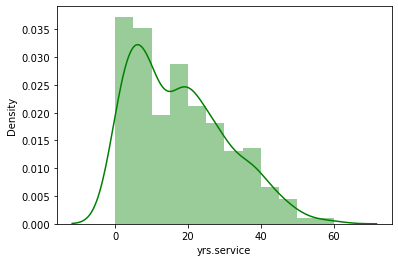

In [35]:
sns.distplot(df['yrs.service'],color='green')

<AxesSubplot:xlabel='sex', ylabel='Density'>

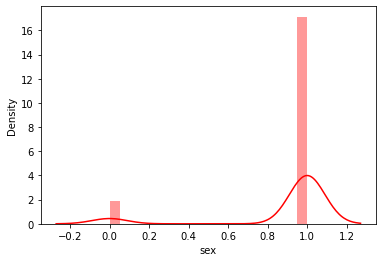

In [36]:
sns.distplot(df['sex'],color='red')

In [37]:
df.corr()['salary']

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

In [38]:
df=df.drop(['sex'],axis=1)
df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


In [39]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 5)

In [40]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))


In [41]:
len(np.where(z>3)[0])

4

In [42]:
z.iloc[4]

rank             0.649257
discipline       0.915403
yrs.since.phd    1.374055
yrs.service      1.800312
salary           0.918768
Name: 4, dtype: float64

In [43]:
df_new=df[(z<3).all(axis=1)]
print("old DataFrame",df.shape)
print("New DataFrame",df_new.shape)
print("total_dropped_rows",df.shape[0]-df_new.shape[0])

old DataFrame (397, 5)
New DataFrame (393, 5)
total_dropped_rows 4


In [44]:
loss_percent=(397-393)/397*100
print(loss_percent,"%")

1.0075566750629723 %


# Model without outlieer is df and model with desired outliers is df_new1:

In [45]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [46]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [47]:
pd.DataFrame(x).skew()

0   -0.818160
1   -0.179514
2   -0.134628
3   -0.129060
dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.20)
lr= LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("result from Linear Regresssion Model")
print("R2 score is",r2_score(pred,y_test))
print("mean_squared_error",mean_squared_error(pred,y_test))

result from Linear Regresssion Model
R2 score is -0.402725421814903
mean_squared_error 535271554.70434886


In [51]:
rf=RandomForestRegressor(n_estimators=1000)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('result from random_forestregressor')
print('R2 score is',r2_score(pred,y_test))
print('mean_squared_error',mean_squared_error(pred,y_test))

result from random_forestregressor
R2 score is -0.018981094332323867
mean_squared_error 562693150.2620884


In [52]:
ab= AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print('Result from AdaBoostRegressor')
print('R2 score is',r2_score(pred,y_test))
print('mean_squared_error',mean_squared_error(pred,y_test))

Result from AdaBoostRegressor
R2 score is -0.5425601785737695
mean_squared_error 570230946.2409036


In [53]:
reg=lr.score(x_train,y_train)
rand=rf.score(x_train,y_train)
ada=ab.score(x_train,y_train)

print(reg)
print(rand)
print(ada)

0.4223750249404785
0.8699548623522625
0.5651109258923053


In [ ]:
pred_rf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
lrf=r2_score(y_test,pred_rf)
for i in range(2,10):
    lrfscore=cross_val_score(rf,x,y,cv=i)
    lrfs=lrfscore.mean()
    print('at cv', i)
    print('cross_validation_score is:',lrfs*100)
    print('R2 score is',lrf*100)
    print("\n")

at cv 2
cross_validation_score is: 34.040477147745534
R2 score is 39.318698390514875


at cv 3
cross_validation_score is: 29.945711490461708
R2 score is 39.318698390514875


at cv 4
cross_validation_score is: 34.81781585155406
R2 score is 39.318698390514875


at cv 5
cross_validation_score is: 26.487172504372253
R2 score is 39.318698390514875


at cv 6
cross_validation_score is: 31.455292177702006
R2 score is 39.318698390514875


at cv 7
cross_validation_score is: 26.574882771642567
R2 score is 39.318698390514875


